In [1]:
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
plt.rcParams['font.family'] = "Malgun Gothic"
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline


Using TensorFlow backend.


In [2]:
import pandas
 
def csvread(filename='Test A.csv'):
    df = pandas.read_csv(filename) # df is pandas.DataFrame
    return df
    

[10.    9.99  9.98 ...  5.07  5.04  5.01]


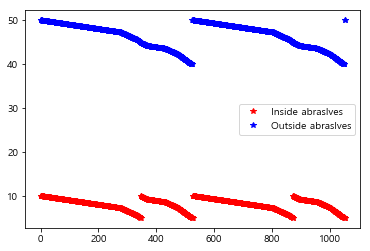

In [3]:
# read csv file
df = csvread('Test A.csv') # df is pandas.DataFrame
inAb = df['Inside abrasives']
outAb = df['Outside abrasives']

inAb = np.array(inAb).astype('float32')
outAb = np.array(outAb).astype('float32')

plt.plot(inAb,'*r', label = "Inside abraslves")
plt.plot(outAb,'*b', label = "Outside abraslves")
plt.legend()
print(inAb)
# write csv file
#final_df.to_csv('new_output.csv', index=False, header=False, columns=['id', 'name', 'age'])

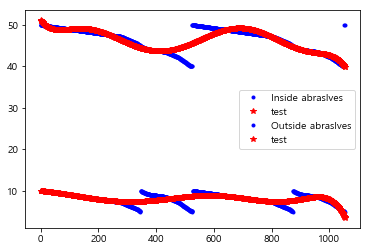

Inside abraslves mse :  0.9540084912163997
Outside abraslves mse :  1.8883474081408758


In [4]:
#inAvb 회귀분석 
Infit = np.polyfit(range(len(inAb)), inAb, 8)
Inpoly = np.poly1d(Infit) # construct the polynomial 

xtest = np.zeros(1054)
for i in range(len(xtest)):
    xtest[i] = i+1
plt.plot(inAb,'.b', label = 'Inside abraslves')
plt.plot(xtest,Inpoly(xtest),'*r',label = 'test')

##outAb 회귀분석
Outfit = np.polyfit(range(len(outAb)), outAb, 8)
Outpoly = np.poly1d(Outfit) # construct the polynomial 

plt.plot(outAb,'.b', label = 'Outside abraslves')
plt.plot(xtest,Outpoly(xtest),'*r',label = 'test')
plt.legend()
plt.show()




inMse = (np.square(Inpoly(xtest) - inAb)).mean(axis=0)
outMse = (np.square(Outpoly(xtest) - outAb)).mean(axis=0)
print("Inside abraslves mse : ",inMse)
print("Outside abraslves mse : ",outMse)


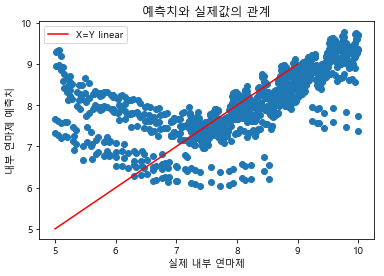

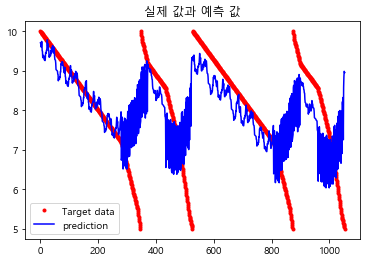

                            OLS Regression Results                            
Dep. Variable:       Inside abrasives   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.063e+04
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:50:27   Log-Likelihood:                -1631.0
No. Observations:                1054   AIC:                             3272.
Df Residuals:                    1049   BIC:                             3297.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Temper            0.3230      0.008     41.605

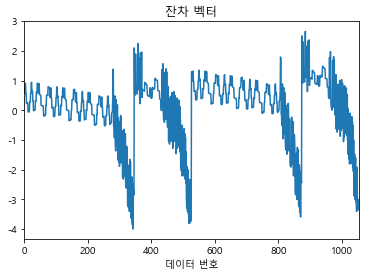

실제 값 - 예측 값 = 잔차벡터 :  16.851175791616356


In [5]:
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

#print(df.head())
#print(df[["Temper","Humidity","Defect Status","Defect Count","Production"]])

data = df
dataA = df[["Temper","Humidity","Defect Status","Defect Count","Production"]]
#dataA = df[["Temper","Humidity","Defect Status"]]
dataTarget = df["Inside abrasives"]
model_dataA = LinearRegression().fit(dataA, dataTarget)

predictions = model_dataA.predict(dataA)
plt.scatter(dataTarget, predictions)
plt.plot(range(5,10),range(5,10),'r', label = 'X=Y linear')
plt.legend()
plt.xlabel(u"실제 내부 연마제")
plt.ylabel(u"내부 연마제 예측치")
plt.title("예측치와 실제값의 관계")
plt.show()



plt.plot(range(len(dataTarget)),dataTarget,'.r',label = 'Target data')
plt.plot(range(len(dataTarget)),predictions,'b', label = 'prediction')
plt.title('실제 값과 예측 값')
plt.legend()
plt.show()
######################################

dfX0 = df
#dfX = sm.tools.tools.add_constant(df)
#dfy = df(dataTarget, columns=["Inside abraslves"])


model = sm.OLS(dataTarget, dataA)
result = model.fit()
print(result.summary())

#fig, ax = plt.subplots(figsize=(12,8))
#fig = sm.graphics.influence_plot(prestige_model, ax=ax, criterion="cooks")

result.resid.plot()
plt.title("잔차 벡터")
plt.xlabel("데이터 번호")
plt.show()
print("실제 값 - 예측 값 = 잔차벡터 : ",result.resid.sum())

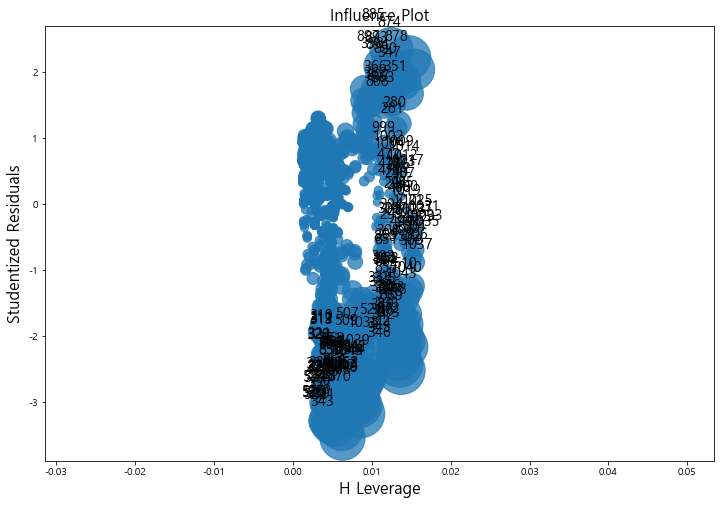

In [6]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(12,8))
fig = influence_plot(result, ax=ax, criterion="cooks")

In [7]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
